# [Intro to Spatial Vector Data in Python](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/)
## Vector Data in Python
Shapefile format is often used to store Geospatial data in vector format. Each shapefile can only store one vector type, either points, lines or polygons Because their structure is different. 

Objects in a shapefile ccan have a set of associated attributes that describe them. For example, a line shapefile that contains the locations of streets, can also contain the associated street name, type of street, length, speed limit, number of lanes and other information about each street line object.

In [2]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
#Enable 2x images
%config InlineBackend.figure_format = 'retina'

# Get data and set working directory (This will change the working directory)
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# type(data)

### Shapefile Structure
Shapefiles have 3 key files associated with them:

* .shp: contains the geometry for all features.
* .shx: indexes the geometry.
* .dbf: stores feature attributes in a tabular format.
These files should be named the same and be located in the same directory.

A shapefile can have other associated files including:

* .prj: plain text. Describes the projections using well-known text format (WKT). Includes the coordinate system and projection information. 
* .sbn and .sbx: spatial index of the features.
* .shp.xml: geospatial metadata in XML format, (e.g. XML format or ISO 19115).

In [3]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")
# .shp: the file that contains the geometry for all features.

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)


### Spatial Data Attributes
Each object attributes are shown in a column similar to a spreadsheet. Each row element represents a spatial object and has a set of attributes associated with it in a column. 

Each object in a shapefile has one or more attributes associated with it. Shapefile attributes are similar to fields or columns in a spreadsheet. Each row in the spreadsheet has a set of columns associated with it that describe the row element.

#### The Geopandas Data Structure
Notice the geometry column in the geopandas data structure. It contains a geometry column that stores the x, y point location values. All other shapefile feature attributes are contained in columns, similar to other GIS tools such as ArcGIS or QGIS.

In [4]:
# View top 6 rows of attribute table
print(sjer_plot_locations.head(6))

# View the geometry type of each row
print("\ngeom type:\n",sjer_plot_locations.geom_type.head(6))

# View number of objects and features
print("\nobjects: {} \nfeatures: {}".format(str(sjer_plot_locations.shape[0]), str(sjer_plot_locations.shape[1])))

Plot_ID   Point     northing     easting plot_type  \
0  SJER1068  center  4111567.818  255852.376     trees   
1   SJER112  center  4111298.971  257406.967     trees   
2   SJER116  center  4110819.876  256838.760     grass   
3   SJER117  center  4108752.026  256176.947     trees   
4   SJER120  center  4110476.079  255968.372     grass   
5   SJER128  center  4111388.570  257078.867     trees   

                         geometry  
0  POINT (255852.376 4111567.818)  
1  POINT (257406.967 4111298.971)  
2  POINT (256838.760 4110819.876)  
3  POINT (256176.947 4108752.026)  
4  POINT (255968.372 4110476.079)  
5  POINT (257078.867 4111388.570)  

geom type:
 0    Point
1    Point
2    Point
3    Point
4    Point
5    Point
dtype: object

objects: 18 
features: 6


### Shapefile Metadata & Attributes

The geospatial metadata is of particular interest and the `gpd.read_file()` function automatically stores this information about the data as attributes. It describes the type or format, Coordinate Reference System, extent, and other components of the vector data, and the attributes which describe properties associated with each individual vector object.

#### Metadata
* Object Type: the class of the imported object.
* Coordinate Reference System (CRS): the projection of the data.
* Extent: the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile. The spatial extent of a shapefile or a geopandas GeoDataFrame represents the geographic "edge" or location that is the furthest north, south east and west. Thus it represents the overall geographic coverage of the spatial object.

In [5]:
# View object type
print("type: ", type(sjer_plot_locations))

# View CRS of object
print("CRS: ", sjer_plot_locations.crs)

# View the spatial extent
print("spatial extent: ", sjer_plot_locations.total_bounds)

type:  <class 'geopandas.geodataframe.GeoDataFrame'>
CRS:  epsg:32611
spatial extent:  [ 254738.618 4107527.074  258497.102 4112167.778]


### Plot the Shapefile
The `.plot() ` function will help with the visualization of the data. It can be used without setting a figure or axis

<AxesSubplot:>

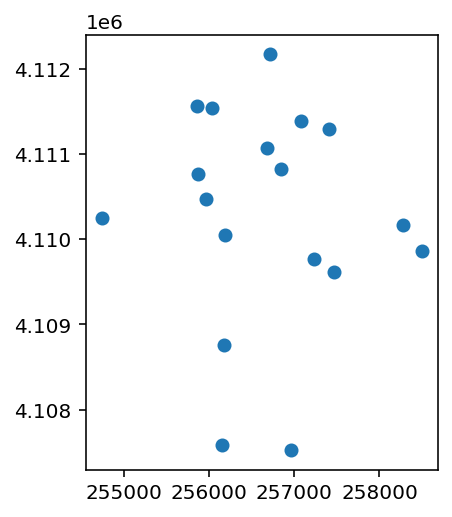

In [6]:
sjer_plot_locations.plot()

Specifying plot attributes can make the plot more readable and help it provide more informaiton by adding extra dimensions. We will use the following attributes

* column: the data attribute column that we want to plot
* categorical= True: set the plot to plot categorical data - in this case plot types.
* legend: to add a legend
* markersize: increase or decrease the size of the points or markers rendered on the plot
* cmap: set the colors used to plot the data


See how adding colors and a legend to the plot makes it provide more information.

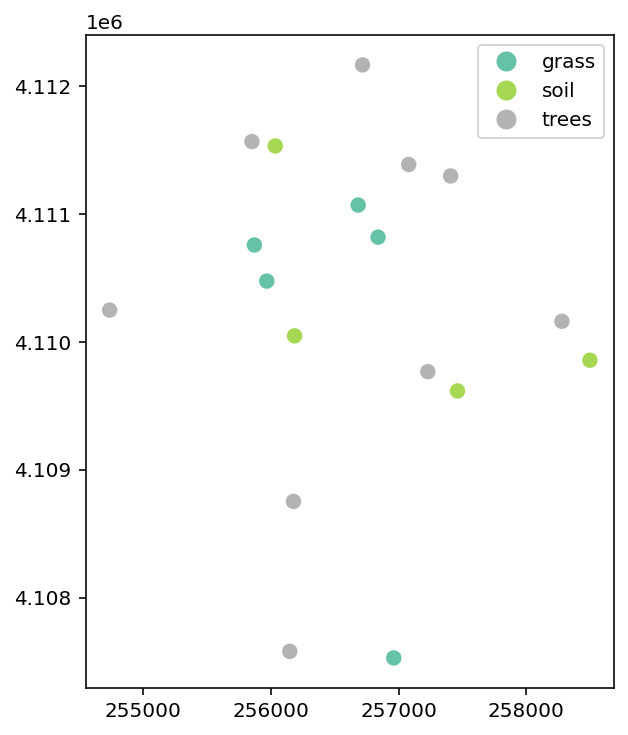

In [9]:
# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2")
                        


plt.show()

Setting an axis object and a figure has its benefits, like adding a tittle, plotting different layers together, setting the axis and specifying the size of the output plot. 


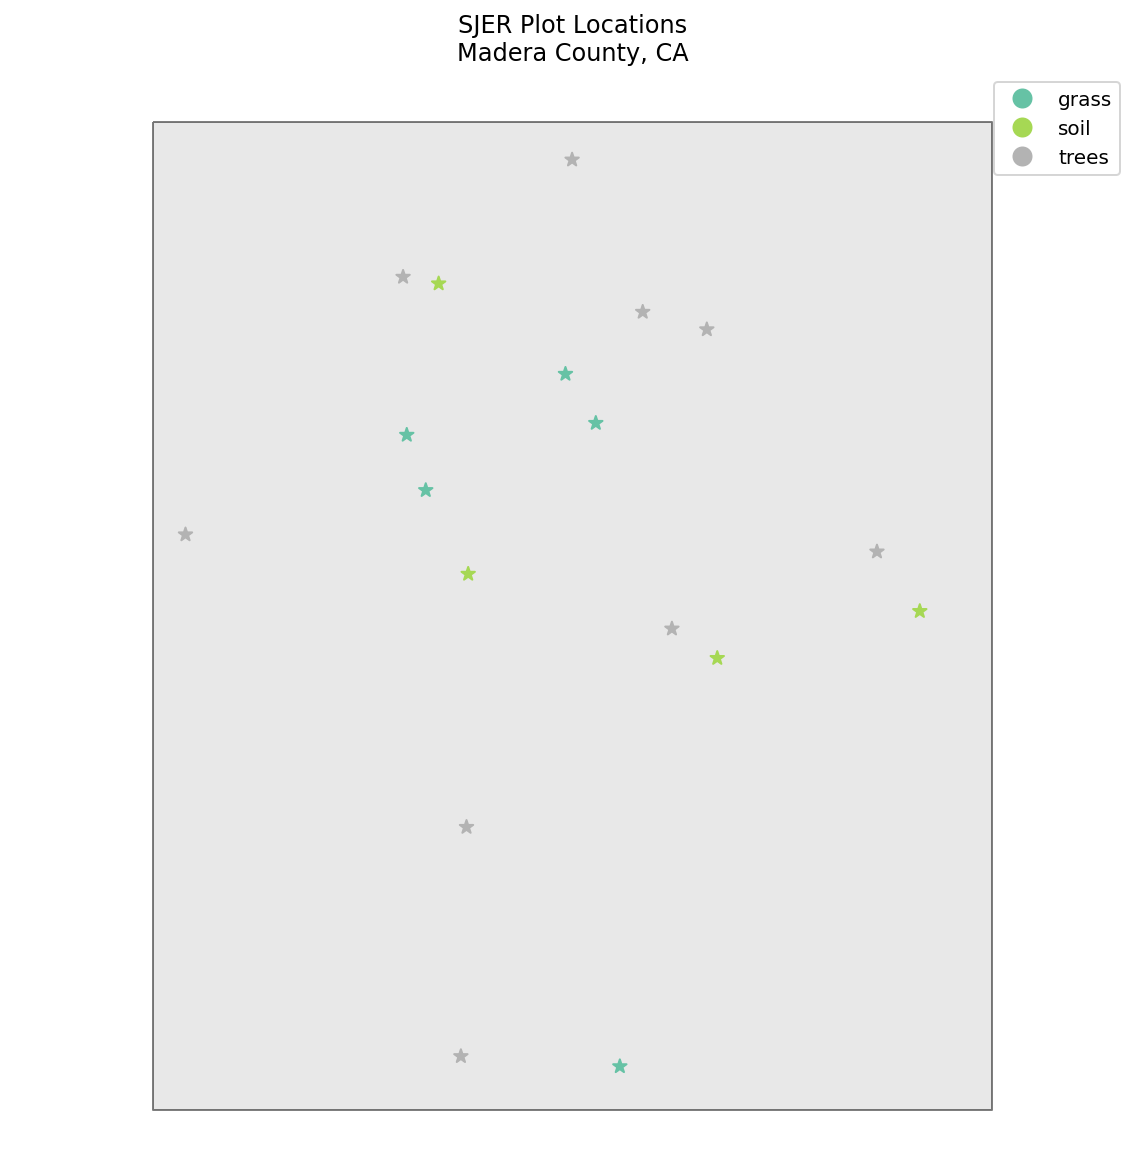

In [10]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

# setup figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

## Coordinate Reference System (CRS)

A CRS is defined to better understand how the projection from the 3D world into a 2D plane is made. The components of the CRS define the “flattening” of data that exists in a 3-D globe space. The CRS also defines the coordinate system itself and the translation between a lcoation on the round earth and the smae location on a flattened 2D coordinate system.

There are many CRS systems, each one optimized to best represent a different characteristic of the globe. They can be optimized to better represent the Shape, scale/distance and/or area.

### Geographic CRS
Geographic CRS is best optimized to locate places in the globe. It uses a grid that wraps around the entire globe applying latitude and longitude values to represent each location, meaning that each point in the globe is defined using the same coordinate system making it great for global analysis.

Lines of latitude run parallel to the equator and divide the earth into 180 equally spaced sections. The reference line for latitude is the equator. Latitudes to the North have a + sign and latitudes to the South have a - sign.

Lines of longitude run perpendicular to the equator and converge at the poles. The reference line for longitude (Prime meridian) runs from the North pole to the South pole through Greenwhich, England. There are 180 longitude lines to both sides of the primer meridian. Longitudes to the East have a + sign and longitudes to the West have a - sign. 

The network of imaginary lines (latitude and longitude) is called a graticule.

The most popular Geographic CRS is WGS84.

featurecla  scalerank                                           geometry
0    Country          1  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...
1    Country          1  POLYGON ((-159.20818 -79.49706, -161.12760 -79...
2    Country          1  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...
3    Country          1  POLYGON ((-121.21151 -73.50099, -119.91885 -73...
4    Country          1  POLYGON ((-125.55957 -73.48135, -124.03188 -73...
5    Country          1  POLYGON ((-98.98155 -71.93333, -97.88474 -72.0...

geom type:
 0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
5    Polygon
dtype: object

objects: 127 
features: 3

First Plygon:  POLYGON ((-59.57209469261153 -80.0401787250963, -59.86584937197463 -80.54965667106187, -60.15965572777012 -81.00032683707931, -62.25539343936708 -80.86317758577667, -64.48812537296985 -80.92193368929257, -65.74166642928995 -80.58882740673914, -65.74166642928995 -80.54965667106187, -66.29003089055504 -80.25577280061799, -64.0376

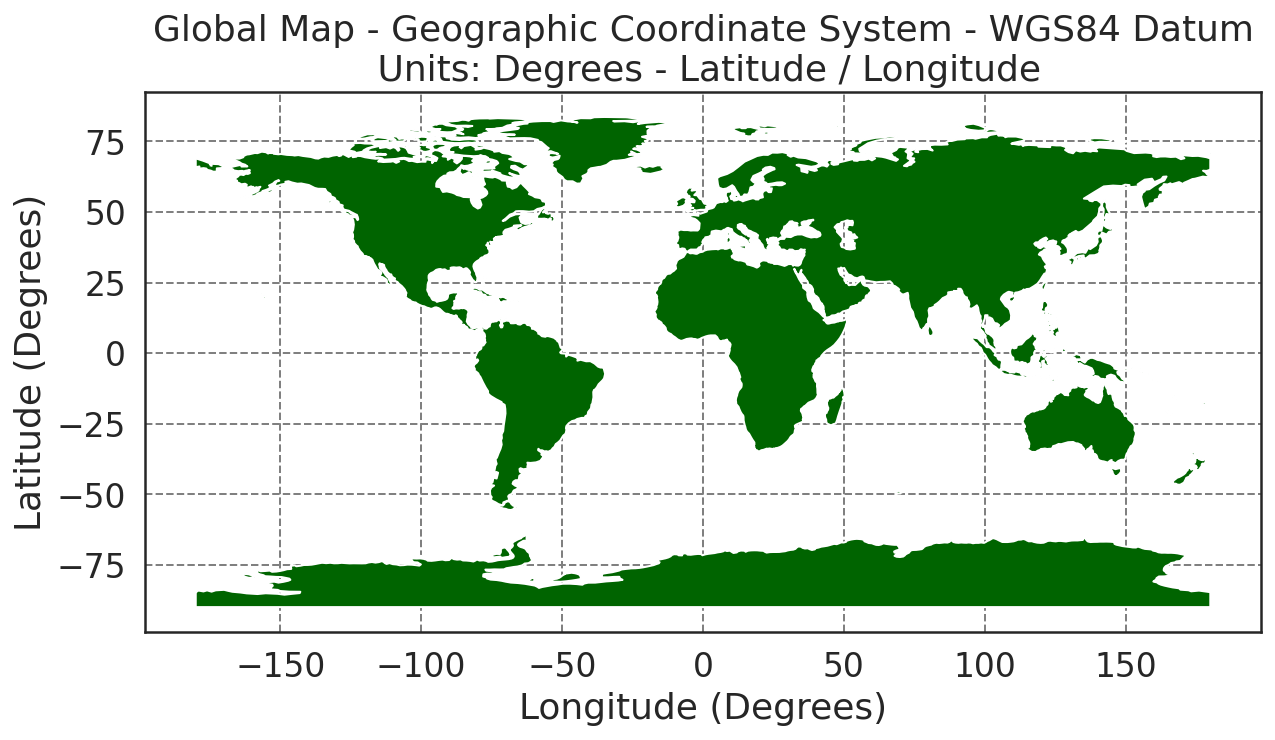

In [58]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# # Set working dir & get data
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

# View top 6 rows of attribute table
print(worldBound.head(6))

# View the geometry type of each row
print("\ngeom type:\n",worldBound.geom_type.head(6))

# View number of objects and features
print("\nobjects: {} \nfeatures: {}".format(str(worldBound.shape[0]), str(worldBound.shape[1])))

# View first polygon attribute table
print("\nFirst Plygon: ",worldBound.geometry[0], "\n")


# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgreen', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

### Create Spatial Point Objects
We are going to add an object based on three locations on the map:
* Boulder, Colorado: 40.0274, -105.2519
* Oslo, Norway: 59.9500, 10.7500
* Mallorca, Spain: 39.6167, 2.9833

The steps to plot this points are:

1. Manually create a np array of the point locations
1. Use a `for loop` to turn the x,y points into Shapely points object
1. Convert the point object to a pandas GeoDataFrame



[<shapely.geometry.point.Point object at 0x7fecb868be20>, <shapely.geometry.point.Point object at 0x7fecb868b7c0>, <shapely.geometry.point.Point object at 0x7fecb868b370>]
                      geometry
0  POINT (-105.25190 40.02740)
1    POINT (10.75000 59.95000)
2     POINT (2.98330 39.61670)


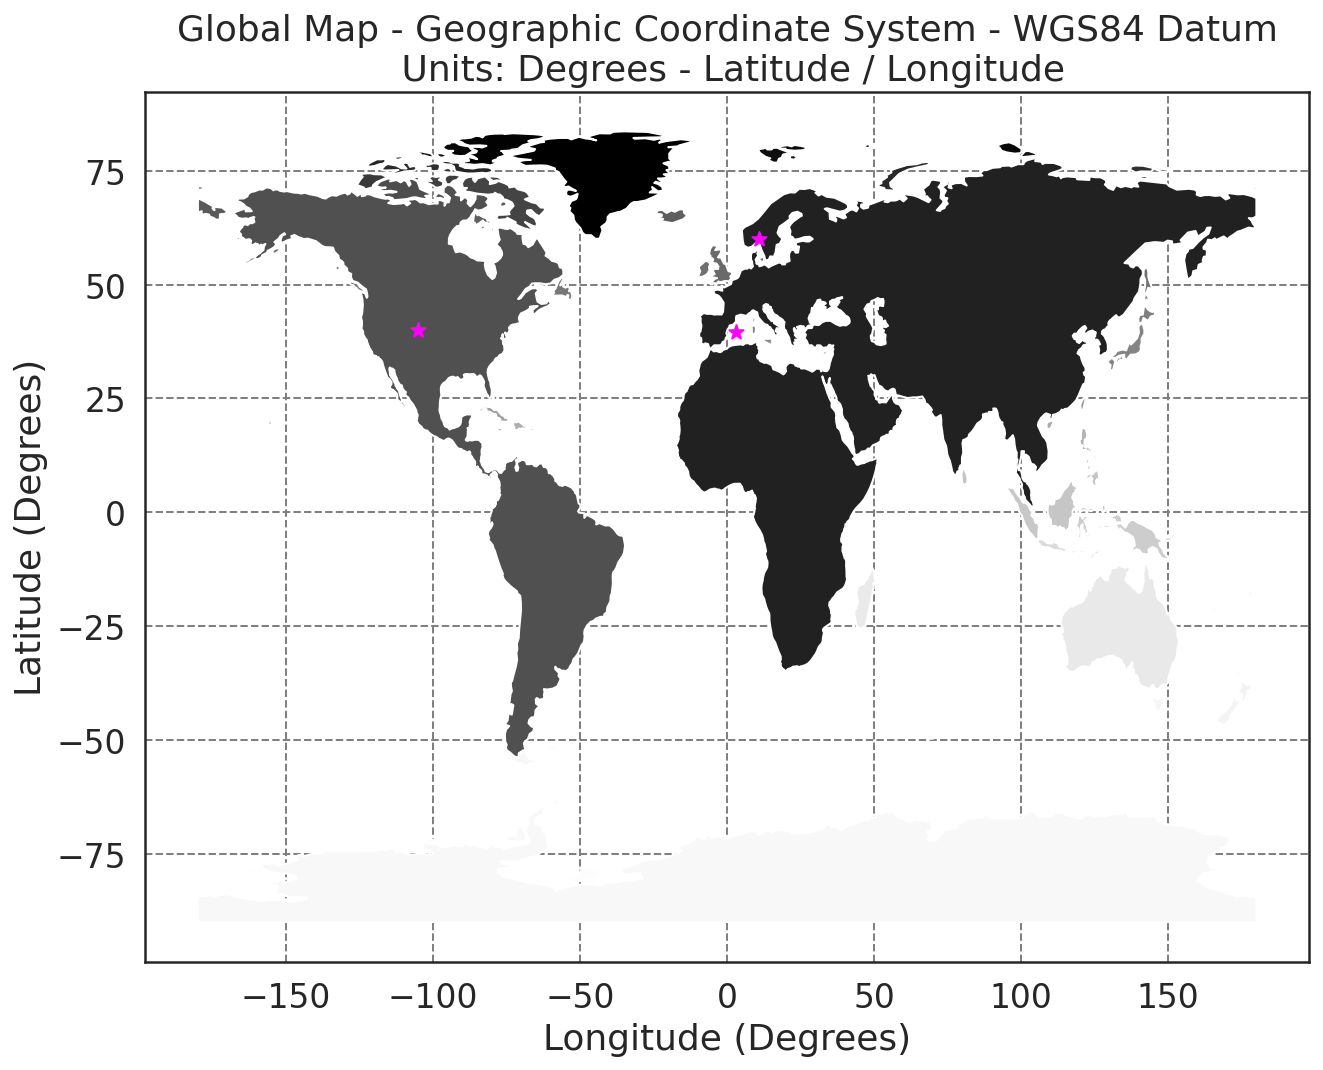

In [59]:
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
print(city_locations)

# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
print(city_locations.head(3))

# Plot point locations
fig, ax = plt.subplots(figsize=(15, 8))

worldBound.plot(figsize=(10, 5), cmap='Greys',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='magenta', 
                    marker='*',
                    markersize=55)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

[Text(0.5, 1.0, 'World Map - Geographic Coordinate Reference System'),
 Text(0.5, 40.5, 'X Coordinates'),
 Text(224.33184792128895, 0.5, 'Y Coordinates')]

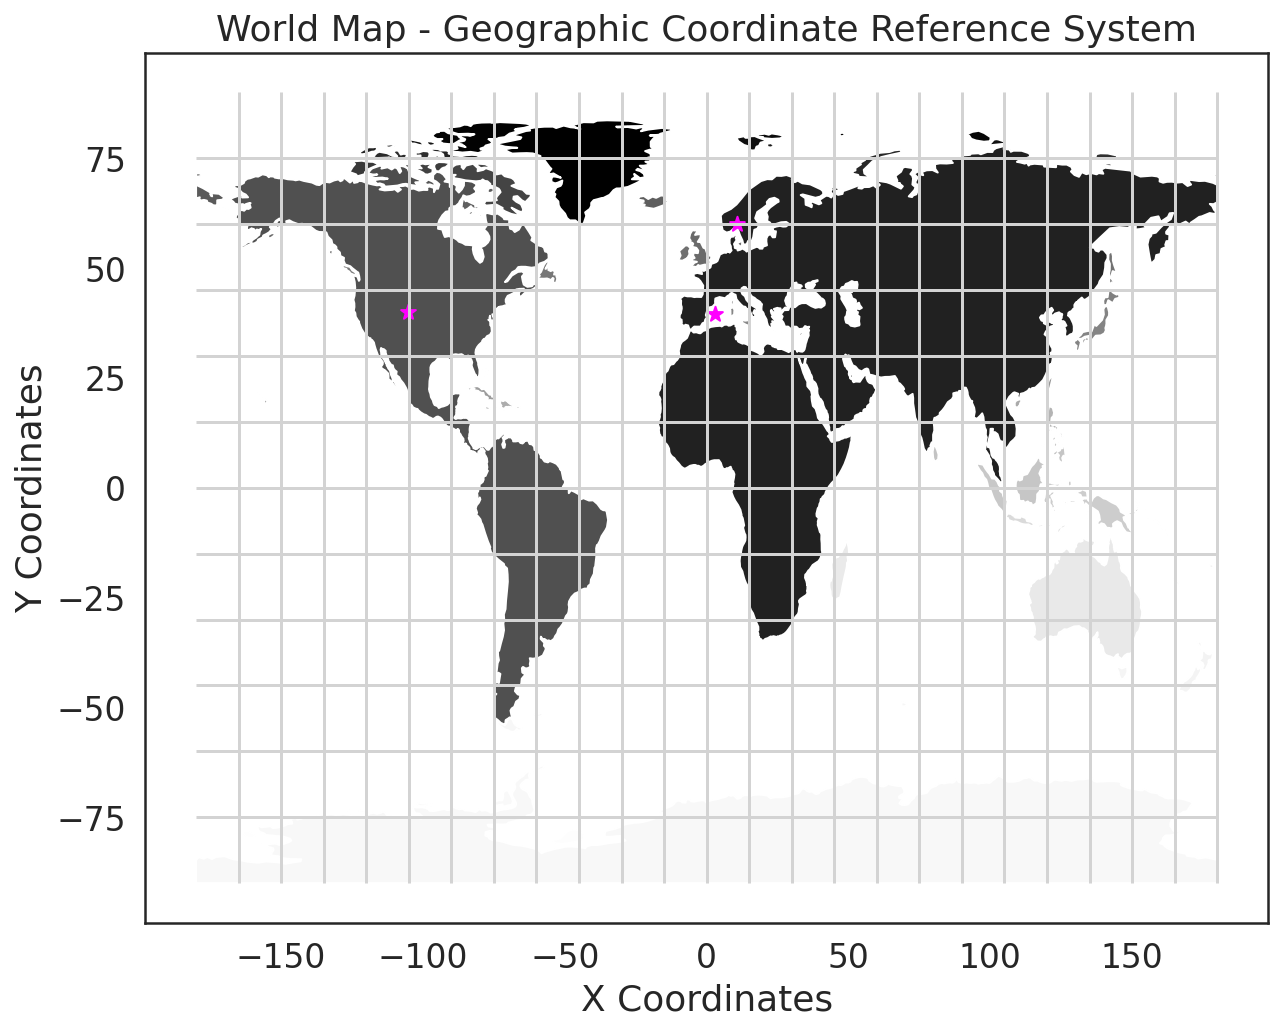

In [60]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
# bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black', cmap='Greys')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='magenta',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System",
       xlabel="X Coordinates",
       ylabel="Y Coordinates")

### Problem with Geographic CRS
When we need to locate places on the globe we use Geographic CRS, that means Latitude and Longitude. Geographic CRS might not be useful when measuring distances as they don't represent uniform linear lenght measurement units meaning distance is distorted when using this system.

### Projected CRS - Robinson
We are going to reproject the data into the robinson projects `(+proj=robin)` and then plot again

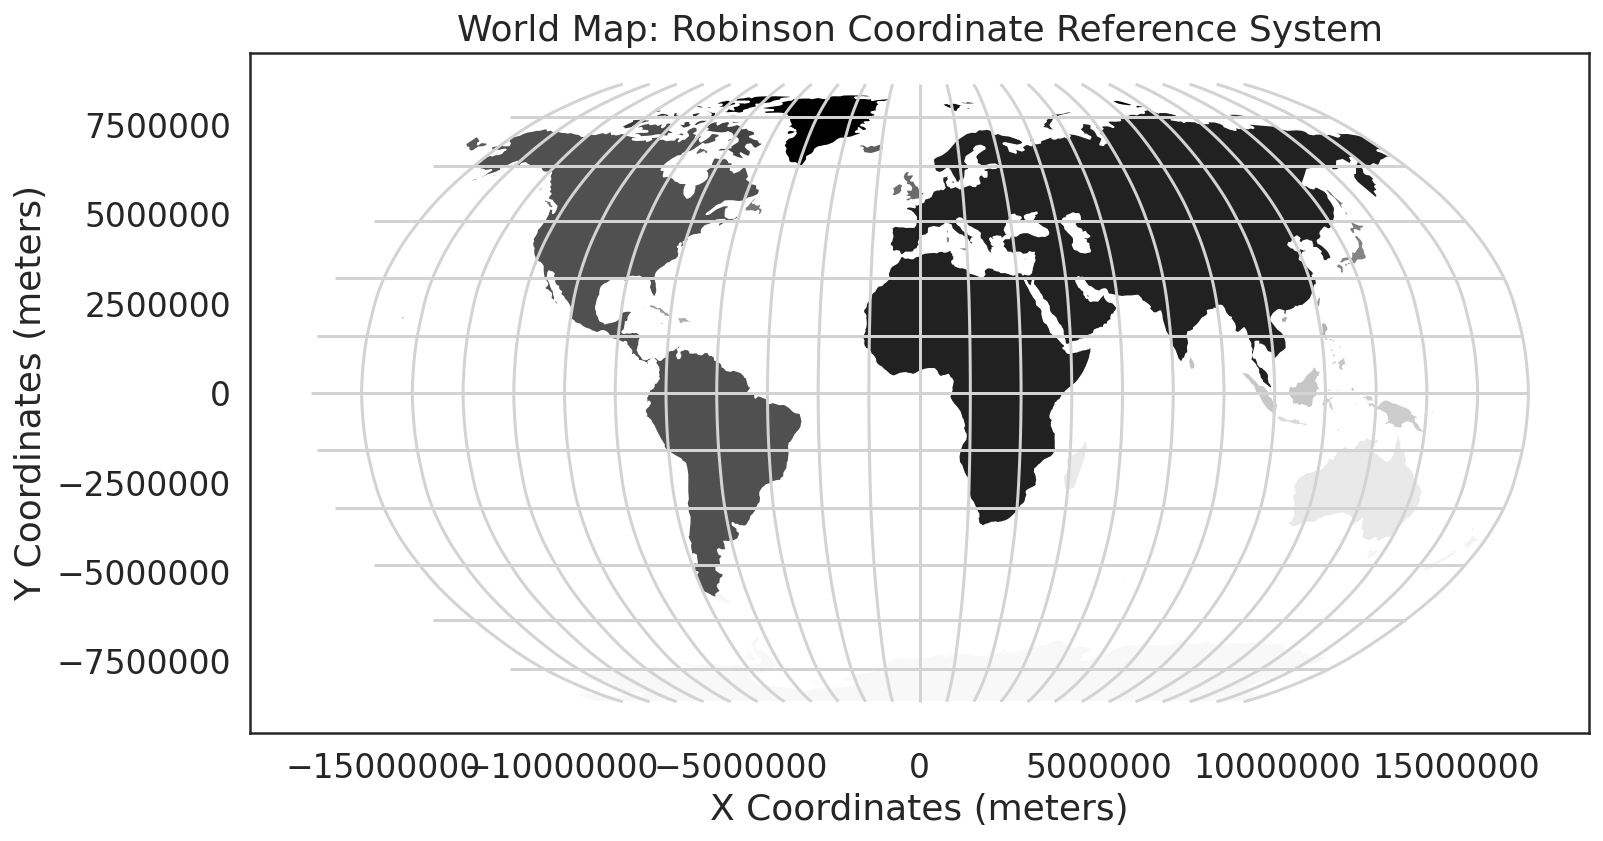

In [50]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k',
                      cmap='Greys')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

We got to plot the glove in the new Robin projection. Let's see what happens if we try to add a layer with the plot of the city_locations object. Rememeber that the city_locations object uses the geographic CRS and thus has Lat/Long coordinates. Notice that they don't line up properly.

(-18706415.123721145, 18706406.403681755, -9487670.13161, 9487670.13161)

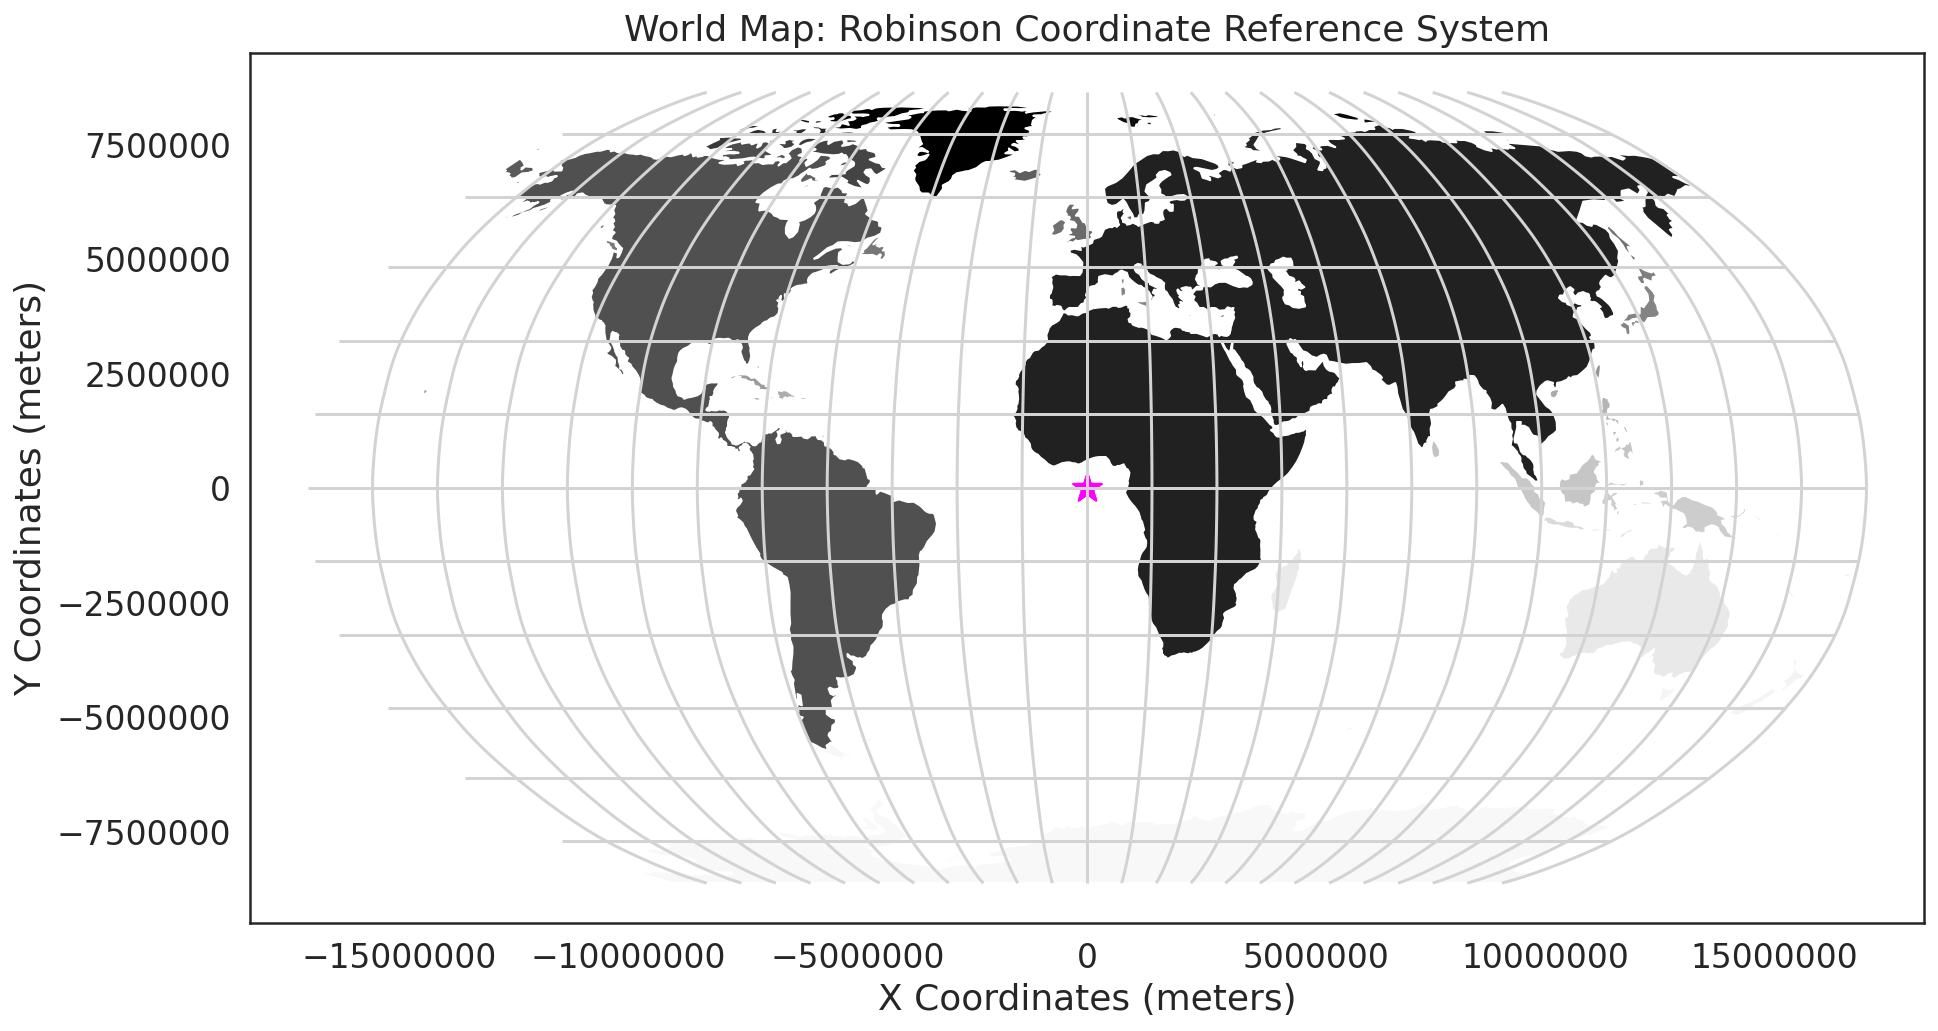

In [49]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

worldBound_robin.plot(ax=ax,
                      color='k',
                      cmap='Greys')
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='magenta', 
                    markersize=220)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal')  

Let's convert the point to the appropiate robinson CRS and plot again

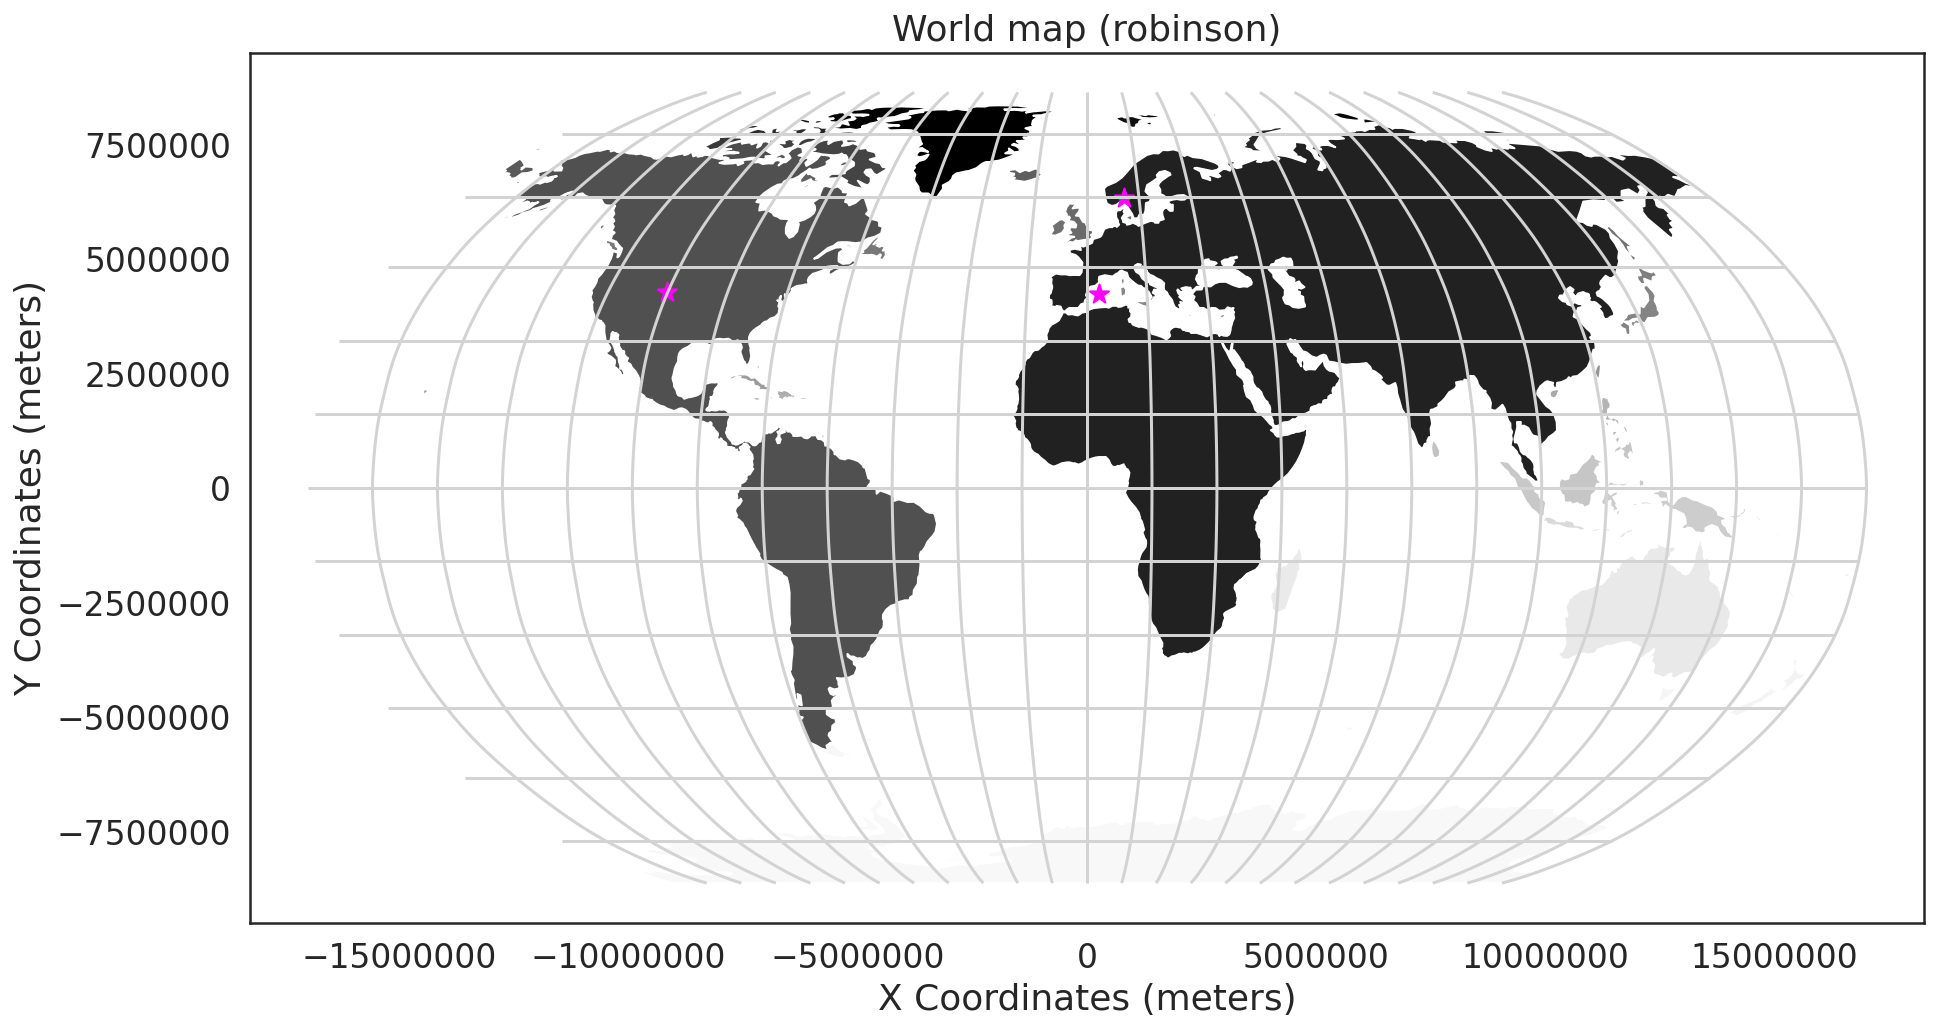

In [48]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

graticule_robin.plot(ax=ax, 
                     color='lightgrey')

worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
                      
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='magenta', marker='*')



for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

We can examine both CRSs side by side. Notice how the x and y axis units on these two maps are completely different. This is one reason why points in a geographic WGS84 CRS don't line up properly when plotted on a map in another CRS like Robinson. However if you reproject the data to the same CRS, then they will line up properly.

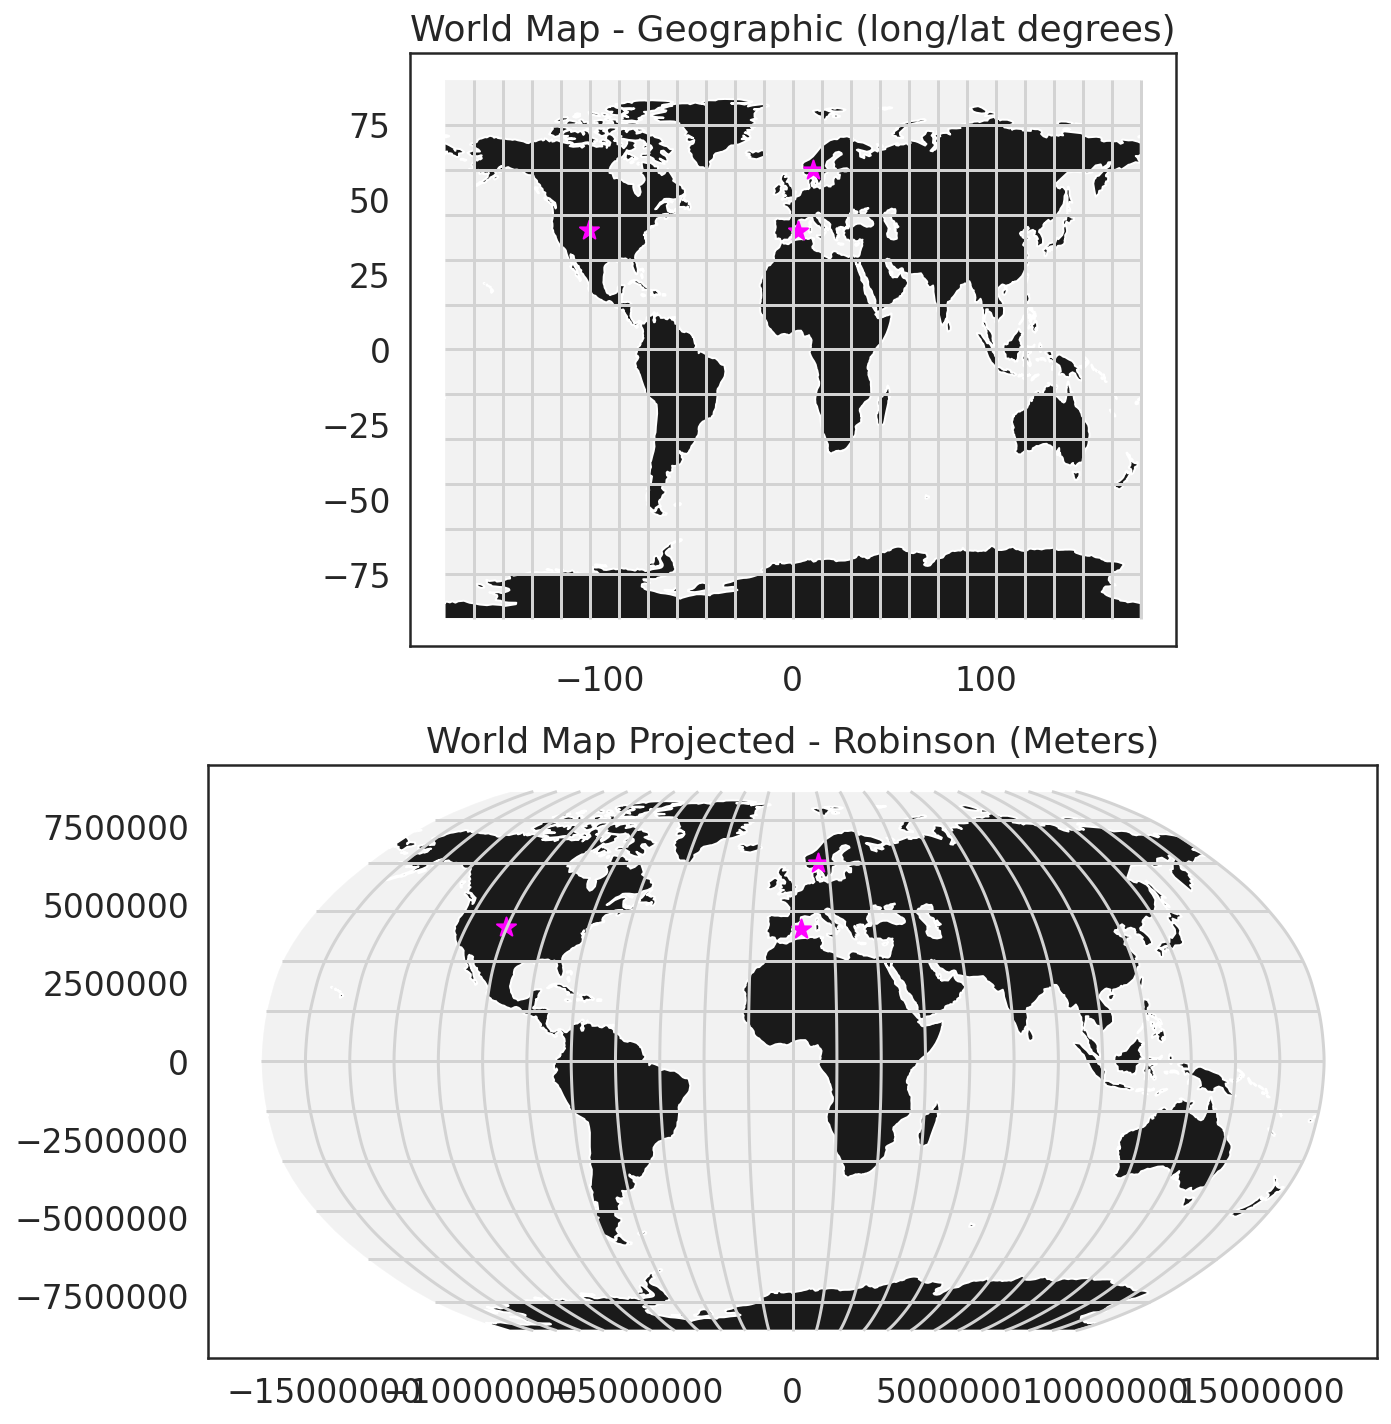

In [57]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='magenta',
                    marker = "*")

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='magenta',
                          marker = "*")

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

## Geographic vs projected CRS
Geographic CRS is practical for location and map representation but is prone to error when quantifying distance. Various spatial projections have evolved that are optimized to more accruraterly represent distance, shape and/or area.

* A geographical coordinate system (GCS) defines where the data is located on the earth's surface. It usually records locations in angular units (usually degrees)
* A projected coordinate system (PCS) tells the data how to draw on a flat surface. It ussually records locations in linear units. A PCS is a GCS that has been flattened using a map projection. (e.g: Adams square II, Behrmann, Aitoff, Berghaus star, Albers, Bonne, Aspect-adaptative cylindrical, Compact Miller[...](https://pro.arcgis.com/en/pro-app/help/mapping/properties/list-of-supported-map-projections.htm))

[source](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/)

### Universal Transverse Mercator (UTM)

UTM subdivides the globe into zones (0-60 equivalent to longitude) and regions (north and south). IT uses a regional projection and associated coordinate system. The coordinate system grid of each zone is projected individually using the Mercator projection (enclose the globe inside a cylinder and project every point into the cylinder).

The origin (0,0) for each UTM zone and associated region is located at the intersection of the equator and a location, 500,000 meters east of the central meridian of each zone. Each zone expands 1 million East and 10 million North or South. UTM zones are also defined using bands lettered C-X.

The UTM system doesn’t apply to polar regions (>80°N or S). Universal Polar Stereographic (UPS) coordinate system is used in these area. This is where zones A, B and Y, Z.




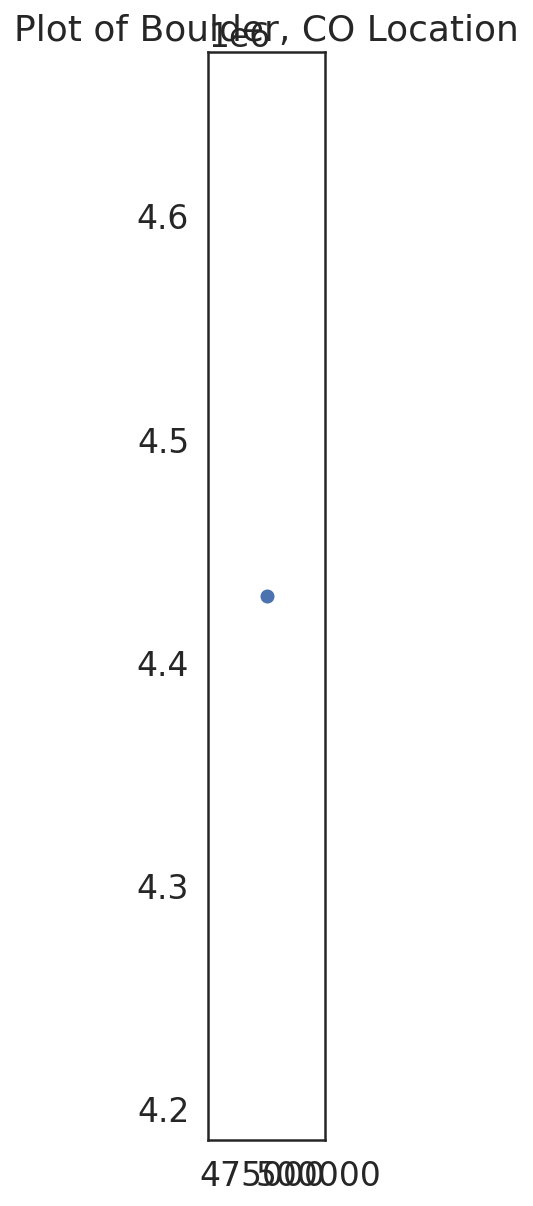

Before: +init=epsg:2957 +type=crs
After: epsg:4326
                      geometry
0  POINT (-105.27055 40.01498)


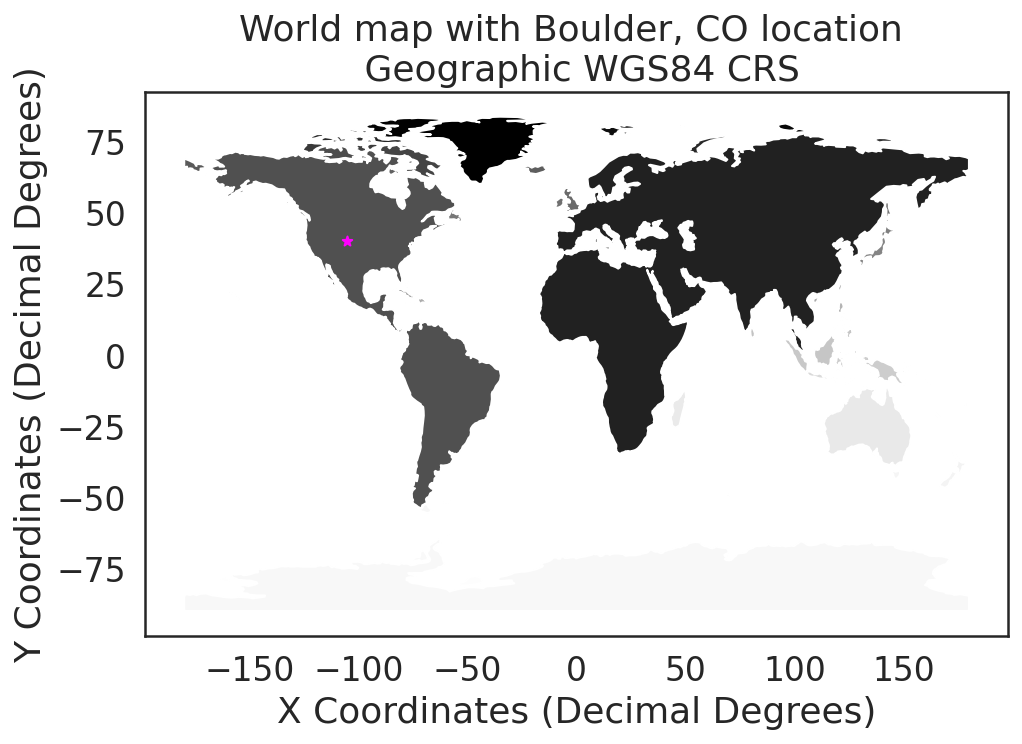

In [77]:
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

fig, ax = plt.subplots(figsize=(10, 10))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CO Location")

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()


# View crs
print("Before:", boulder_loc.crs)

# Reproject the data to WGS84
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
boulder_df_geog.crs

# View crs
print("After:", boulder_df_geog.crs)

# View the coordinate values of the newly reprojected data.
print(boulder_df_geog)



fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=25,
                     color='magenta',
                     marker = '*')
# boulder_loc.plot(ax=ax,
#                      markersize=25,
#                      color='green',
#                      marker = '*')
plt.show()



### Datum
Datum describes the vertical and horizontal reference point or origin (0,0) of the coordinate system. 

Frequently encountered datums:

* WGS84 – World Geodetic System (created in) 1984. The origin is the center of the earth.
* NAD27 & NAD83 – North American Datum 1927 and 1983, respectively. The origin for NAD 27 is Meades Ranch in Kansas.
* ED50 – European Datum 1950



## Coordinate Reference System Formats

Many formats can be used to document a CRS. Three common formats include:

* proj.4: we have to specify the complete set of parameters separated with a `+` sign and include the ellipse, datum, projection units and projection definition that define a particular CRS. 
  * e.g. *+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0*
  * +proj= : the projection
  * +zone= : only when +proj is utm
  * +units= : Units of coordinates
  * +ellps = : The ellipsoid that shows how the earth's roundness is calculated.
* EPSG: more concise. 4-5 digit numbers that represent a particular CRS definitions. 
* Well-known Text (WKT): compact machine and human-readable representation of geometric onjects. Uses a combination af brackets `[]`, elements separated by commas `,` and elements in UPPERCASE.
  * e.g. *GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]*

### How to look up a CRS
The most popular website to visit is the [spatial reference.org website] (spatialreference.org) where we can look-up the CRS information and explore various formats including proj.4, EPSG and WKT.





